folder for all files fft values in txt format.

In [1]:
import numpy as np
import pandas as pd
import os
import glob

# Directory containing the files
dir_path = "/kaggle/input/bearing-dataset/1st_test/1st_test/"  # Update with your path

# Get all files sorted
file_list = sorted(glob.glob(os.path.join(dir_path, "*")))

# Parameters
fs = 20480  # 20.48 kHz
window_size = 512  # Each FFT segment
step_size = 128  # Step size for sliding window
fft_length = 128  # Take only first 128 points from each window

# Process all files
for file_path in file_list:
    # Load the selected file
    data = pd.read_csv(file_path, header=None, sep='\s+')
    
    if data.shape[1] < 6:  # Ensure enough columns exist
        print(f"Skipping {file_path}: Not enough columns")
        continue
    
    total_data_points = len(data)
    fft_results = []
    
    for start_idx in range(0, total_data_points - window_size + 1, step_size):
        end_idx = start_idx + window_size
        
        # Extract segment for Bearing 3 (Columns 4 & 5)
        segment = data.iloc[start_idx:end_idx, [4, 5]]
        bearing_3 = segment.mean(axis=1)  # Compute mean of Bearing 3
        
        # Compute FFT and take only first 128 values
        fft_values_3 = np.abs(np.fft.fft(bearing_3))[:fft_length]
        
        fft_results.append(fft_values_3)
    
    # Convert list to numpy array
    fft_results = np.array(fft_results)
    
    # Save FFT values to a text file
    output_filename = os.path.join("output_fft", f"fft_Bearing3_{os.path.basename(file_path)}.txt")
    os.makedirs("output_fft", exist_ok=True)
    np.savetxt(output_filename, fft_results, fmt='%.6f')
    
    


Created csv file of file name, min, max value.

In [2]:
import numpy as np
import os
import glob
import pandas as pd

# Directory containing the FFT text files
fft_dir = "output_fft"

# Get all .txt files in the directory
fft_files = sorted(glob.glob(os.path.join(fft_dir, "*.txt")))

# List to store results
results = []

# Process each file
for file_path in fft_files:
    # Load FFT values from the text file
    fft_data = np.loadtxt(file_path)

    # Compute min and max
    file_min = np.min(fft_data)
    file_max = np.max(fft_data)

    # Append results
    results.append([os.path.basename(file_path), file_min, file_max])

# Convert to DataFrame
df = pd.DataFrame(results, columns=["File Name", "Min Value", "Max Value"])

# Save as CSV
csv_filename = "fft_min_max_values.csv"
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' created successfully!")


CSV file 'fft_min_max_values.csv' created successfully!


finding min and max value.

In [3]:
data = pd.read_csv(csv_filename)
min_value = data["Min Value"].min()
max_value = data["Max Value"].max()
print(min_value)
print(max_value)

0.000354
122.4995


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob

# Directory containing the FFT text files
fft_dir = "output_fft"

# Get all .txt files
fft_files = sorted(glob.glob(os.path.join(fft_dir, "*.txt")))
if not fft_files:
    print("No FFT files found in output_fft directory.")
    exit()

# Normalize values range
min_val = 0.000354
max_val = 122.4995

# Provide the index number of the FFT file you want to convert (e.g., 0 for the first file)
file_index = 2155  # Change this number to the desired file index

# Check if the file index is valid
if file_index < 0 or file_index >= len(fft_files):
    print("Invalid file index!")
    exit()

# Get the selected FFT file
file_path = fft_files[file_index]

# Load FFT values from the text file
fft_values = np.loadtxt(file_path)

# Normalize values between 0 and 255
norm_fft = (fft_values - min_val) / (max_val - min_val) * 255
norm_fft = np.clip(norm_fft, 0, 255)  # Ensure values stay in range

# Ensure image dimensions (160x256)
image_array = norm_fft[:160, :256] if norm_fft.shape[0] >= 160 else norm_fft

# Convert to grayscale image
image = Image.fromarray(image_array.astype(np.uint8))
image = image.resize((256, 160))  # Resize to 256x160

# Save image (in the current directory without a specific image_dir)
image_filename = os.path.basename(file_path).replace(".txt", ".png")
image.save(image_filename)

print(f"Image {image_filename} has been successfully generated and saved!")


Image fft_Bearing3_2003.11.25.23.39.56.png has been successfully generated and saved!


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob

# Directory containing the FFT text files
fft_dir = "output_fft"
image_dir = "output_images"

# Create folder for images if it doesn't exist
os.makedirs(image_dir, exist_ok=True)

# Get all .txt files
fft_files = sorted(glob.glob(os.path.join(fft_dir, "*.txt")))
if not fft_files:
    print("No FFT files found in output_fft directory.")
    exit()

# Normalization range
min_val = 0.000354
max_val = 122.4995

for file_path in fft_files:
    # Load FFT values from the text file
    fft_values = np.loadtxt(file_path)

    # Normalize values between 0 and 255
    norm_fft = (fft_values - min_val) / (max_val - min_val) * 255
    norm_fft = np.clip(norm_fft, 0, 255)  # Ensure values stay in range

    # Ensure image dimensions (160x256)
    image_array = norm_fft[:160, :256] if norm_fft.shape[0] >= 160 else norm_fft

    # Convert to grayscale image
    image = Image.fromarray(image_array.astype(np.uint8))
    image = image.resize((256, 160))  # Resize to 256x160

    # Save image
    image_filename = os.path.join(image_dir, os.path.basename(file_path).replace(".txt", ".png"))
    image.save(image_filename)

   

print("All images have been successfully generated and saved in 'output_images'!")


All images have been successfully generated and saved in 'output_images'!


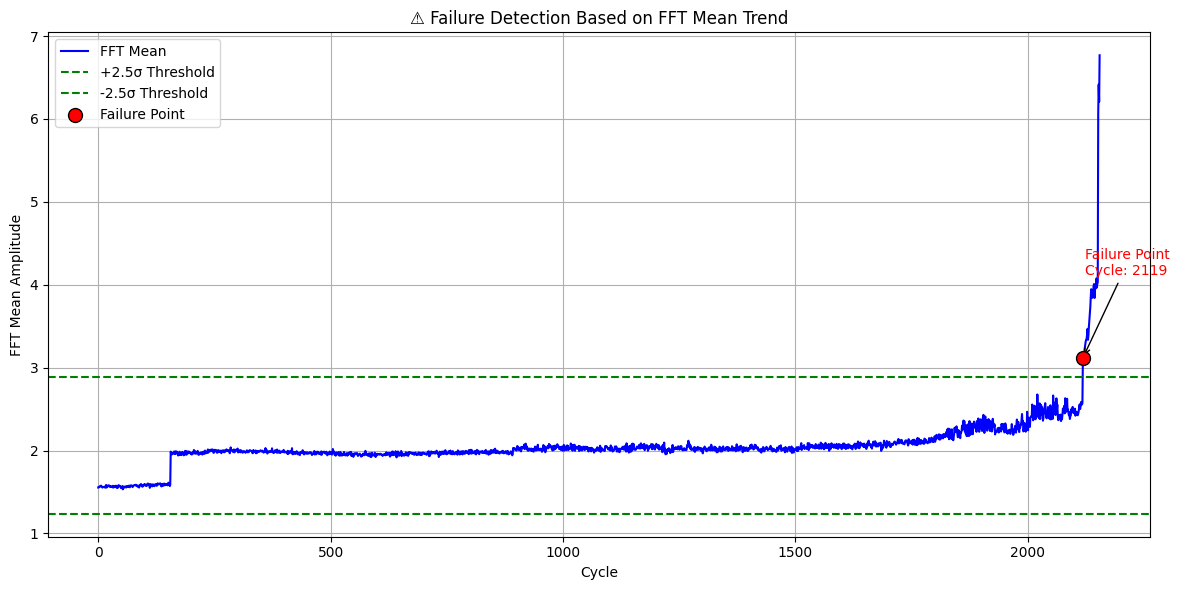

🔴 First Detected Failure Point:
Index 2119, File: fft_Bearing3_2003.11.25.10.47.32.txt, Mean: 3.1180, Z: 3.22


In [6]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Step 1: Load all FFT files in time order
fft_dir = "output_fft"
fft_files = sorted(glob.glob(os.path.join(fft_dir, "*.txt")))

# Step 2: Track a signal trend (e.g., mean amplitude of FFT window)
fft_means = []

for file in fft_files:
    fft_data = np.loadtxt(file)
    
    # Calculate mean of each FFT segment in the file and average them
    segment_means = np.mean(fft_data, axis=1)
    file_mean = np.mean(segment_means)
    fft_means.append(file_mean)

# Convert to NumPy array
fft_means = np.array(fft_means)

# Step 3: Apply Z-score to detect anomaly
z_scores = zscore(fft_means)

# Define threshold for anomaly
threshold = 2.5
anomaly_indices = np.where(np.abs(z_scores) > threshold)[0]

# Get first anomaly index (if any)
first_failure_idx = anomaly_indices[0] if len(anomaly_indices) > 0 else None

# Step 4: Visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot all values in blue
ax.plot(range(len(fft_means)), fft_means, color='blue', label="FFT Mean")

# Plot threshold lines
mean_val = np.mean(fft_means)
std_val = np.std(fft_means)
upper_line = mean_val + threshold * std_val
lower_line = mean_val - threshold * std_val
ax.axhline(upper_line, color='green', linestyle='--', label=f'+{threshold}σ Threshold')
ax.axhline(lower_line, color='green', linestyle='--', label=f'-{threshold}σ Threshold')

# Mark the first failure point in red
if first_failure_idx is not None:
    ax.scatter(first_failure_idx, fft_means[first_failure_idx], color='red', s=100, edgecolors='black', zorder=5, label="Failure Point")
    ax.annotate(f'Failure Point\nCycle: {first_failure_idx}',
                xy=(first_failure_idx, fft_means[first_failure_idx]),
                xytext=(first_failure_idx + 5, fft_means[first_failure_idx] + 1),
                arrowprops=dict(facecolor='red', arrowstyle='->'),
                fontsize=10, color='red')


# Labels and formatting
ax.set_title("⚠️ Failure Detection Based on FFT Mean Trend")
ax.set_xlabel("Cycle")
ax.set_ylabel("FFT Mean Amplitude")
ax.grid(True)
ax.legend()
plt.tight_layout()

# Save and show plot
plt.savefig("fft_failure_detection_first_only.png")
plt.show()

# Step 5: Report estimated failure file(s)
if first_failure_idx is not None:
    print("🔴 First Detected Failure Point:")
    print(f"Index {first_failure_idx}, File: {os.path.basename(fft_files[first_failure_idx])}, Mean: {fft_means[first_failure_idx]:.4f}, Z: {z_scores[first_failure_idx]:.2f}")
else:
    print("✅ No significant anomaly detected — no clear failure point found.")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


✅ Cluster labels saved to: image_labels.csv


<ipython-input-7-682c784d0f9a>:93: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
<ipython-input-7-682c784d0f9a>:94: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig("fft_kmeans_cycle_vs_pc1_plot.png")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


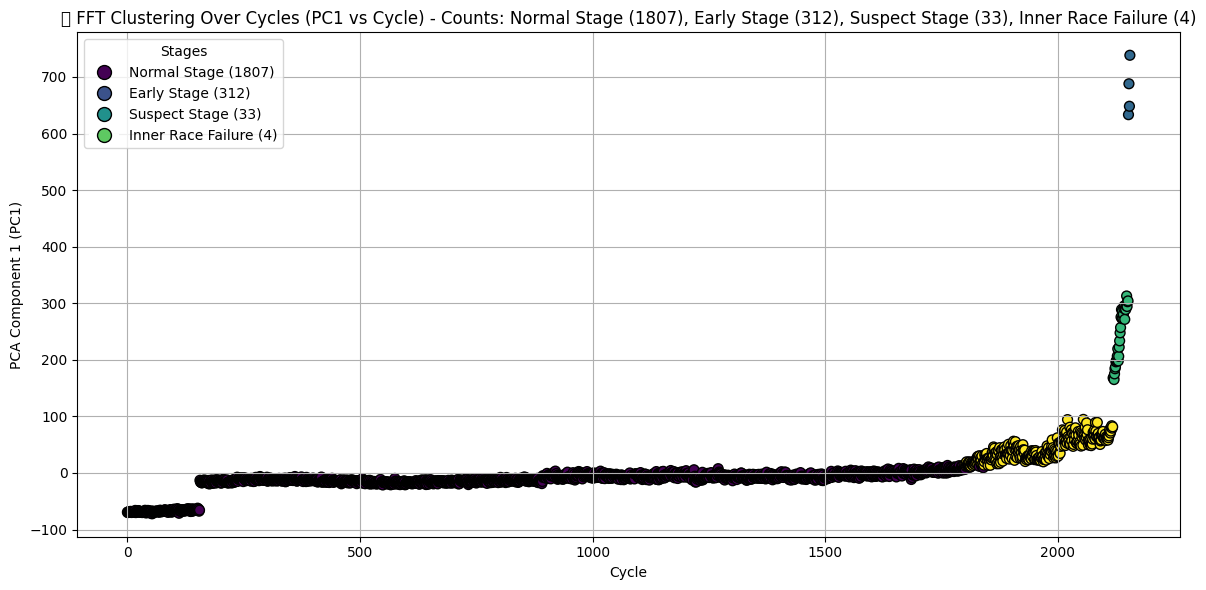

In [7]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Paths
fft_dir = "output_fft"
image_dir = "output_images"
output_csv = "image_labels.csv"

# Load FFT data
fft_files = sorted(glob.glob(os.path.join(fft_dir, "*.txt")))
image_files = [os.path.join(image_dir, os.path.basename(f).replace(".txt", ".png")) for f in fft_files]

# List to store flattened FFT features
fft_features = []

for file in fft_files:
    data = np.loadtxt(file)  # shape: (num_segments, fft_length)
    feature_vector = data.flatten()  # convert to 1D vector
    fft_features.append(feature_vector)

# Convert to numpy array
X = np.array(fft_features)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: reduce dimensionality for clustering
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Map numeric labels to stage names
label_mapping = {
    0: "Normal Stage",
    1: "Inner Race Failure",
    2: "Suspect Stage",
    3: "Early Stage"
}
stage_labels = [label_mapping[l] for l in labels]

# Save image paths and labels
df = pd.DataFrame({
    "image_path": image_files,
    "cluster_label": labels,
    "stage_label": stage_labels
})

df.to_csv(output_csv, index=False)
print(f"✅ Cluster labels saved to: {output_csv}")

# 📊 Plot clustering results: Cycle index vs PCA Component 1
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

cycle_index = range(len(fft_files))  # X-axis: cycle/time order
pc1 = X_pca_2d[:, 0]                 # Y-axis: First PCA component

# Count for legend title
from collections import Counter
label_counts = Counter(stage_labels)
legend_labels = [f"{label} ({count})" for label, count in label_counts.items()]

# Map each string label to a unique color using a lookup
unique_labels = list(label_mapping.values())
color_map = {label: i for i, label in enumerate(unique_labels)}
color_indices = [color_map[label] for label in stage_labels]

plt.figure(figsize=(12, 6))
scatter = plt.scatter(cycle_index, pc1, c=color_indices, cmap='viridis', s=50, edgecolors='k')

# Build legend manually
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=lbl, markerfacecolor=plt.cm.viridis(i / len(unique_labels)), markersize=10, markeredgecolor='k')
    for i, lbl in enumerate(legend_labels)
]

plt.legend(handles=legend_elements, title="Stages")
plt.title(f"📈 FFT Clustering Over Cycles (PC1 vs Cycle) - Counts: {', '.join(legend_labels)}")
plt.xlabel("Cycle")
plt.ylabel("PCA Component 1 (PC1)")
plt.grid(True)
plt.tight_layout()
plt.savefig("fft_kmeans_cycle_vs_pc1_plot.png")
plt.show()


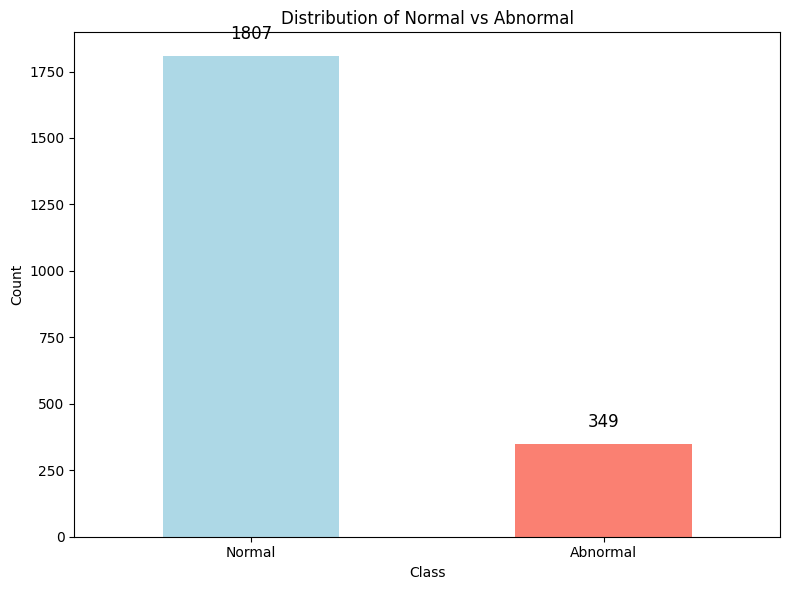


🔍 Training LeNet...
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.8521 - loss: 0.3599 - val_accuracy: 0.3584 - val_loss: 0.9400
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9764 - loss: 0.0913 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9831 - loss: 0.0578 - val_accuracy: 0.8960 - val_loss: 0.2140
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.9891 - loss: 0.0298 - val_accuracy: 0.9191 - val_loss: 0.1765
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9968 - loss: 0.0059 - val_accuracy: 0.9364 - val_loss: 0.1205
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 676ms/step

✅ LeNet Validation Accuracy: 1.0000
✅ LeNet Test Accuracy: 0.9838
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 700ms/step


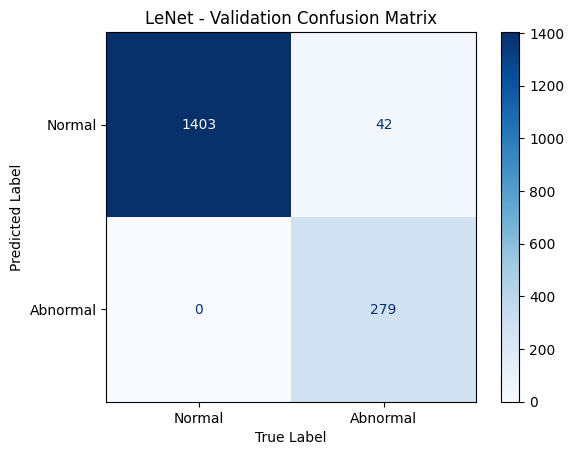

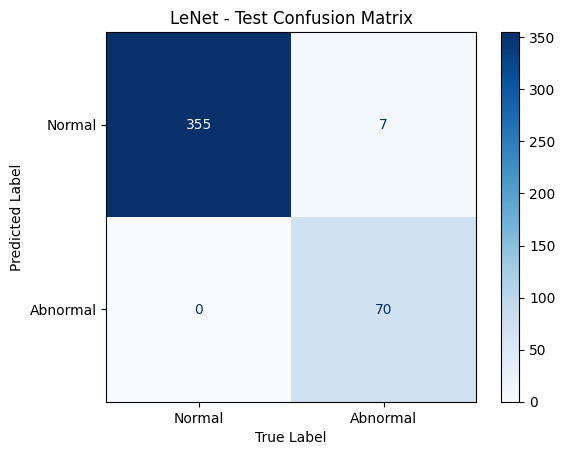


LeNet - Validation Classification Report:

54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 697ms/step
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99      1445
    Abnormal       0.87      1.00      0.93       279

    accuracy                           0.98      1724
   macro avg       0.93      0.99      0.96      1724
weighted avg       0.98      0.98      0.98      1724


LeNet - Test Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99       362
    Abnormal       0.91      1.00      0.95        70

    accuracy                           0.98       432
   macro avg       0.95      0.99      0.97       432
weighted avg       0.99      0.98      0.98       432


🔍 Training CustomCNN...
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9245 - loss: 0.3552 - val_accuracy: 0.0000e+00 - val_loss: 3.0325
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.927

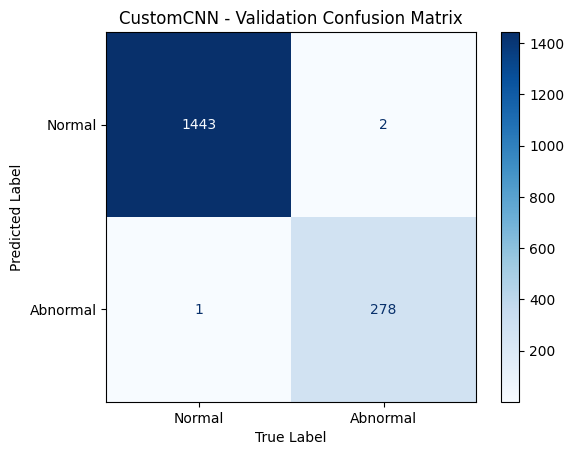

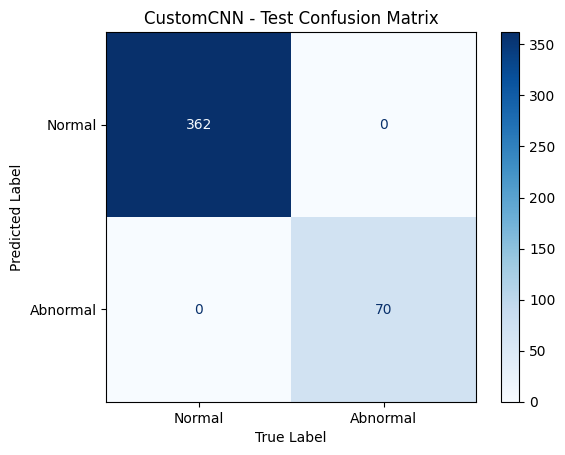


CustomCNN - Validation Classification Report:

54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 453ms/step
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      1445
    Abnormal       0.99      1.00      0.99       279

    accuracy                           1.00      1724
   macro avg       1.00      1.00      1.00      1724
weighted avg       1.00      1.00      1.00      1724


CustomCNN - Test Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       362
    Abnormal       1.00      1.00      1.00        70

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



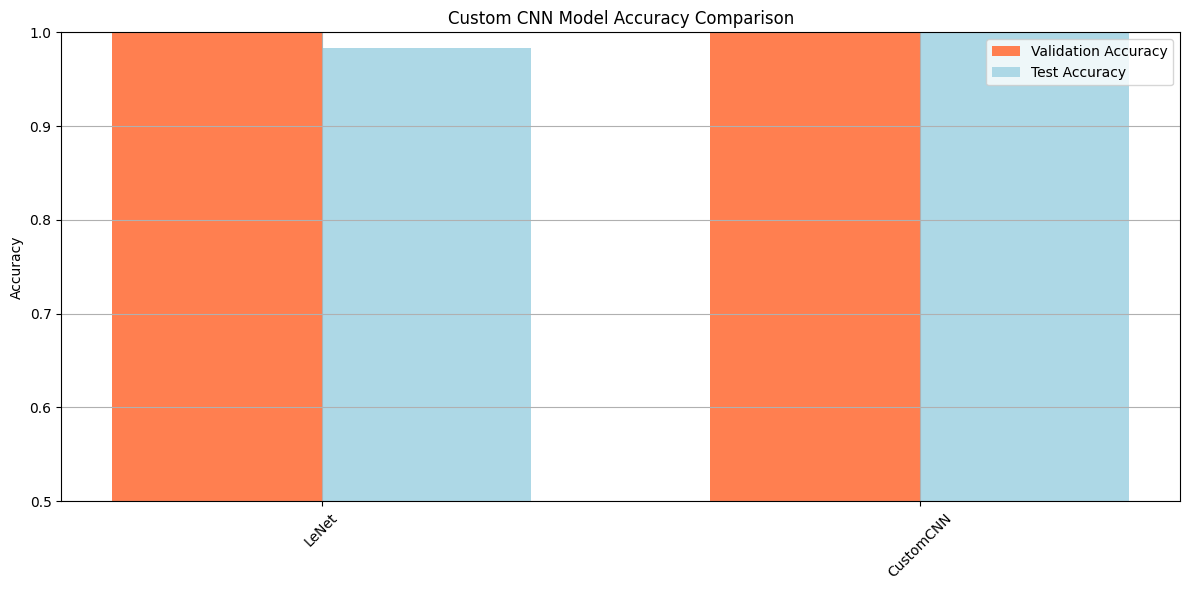

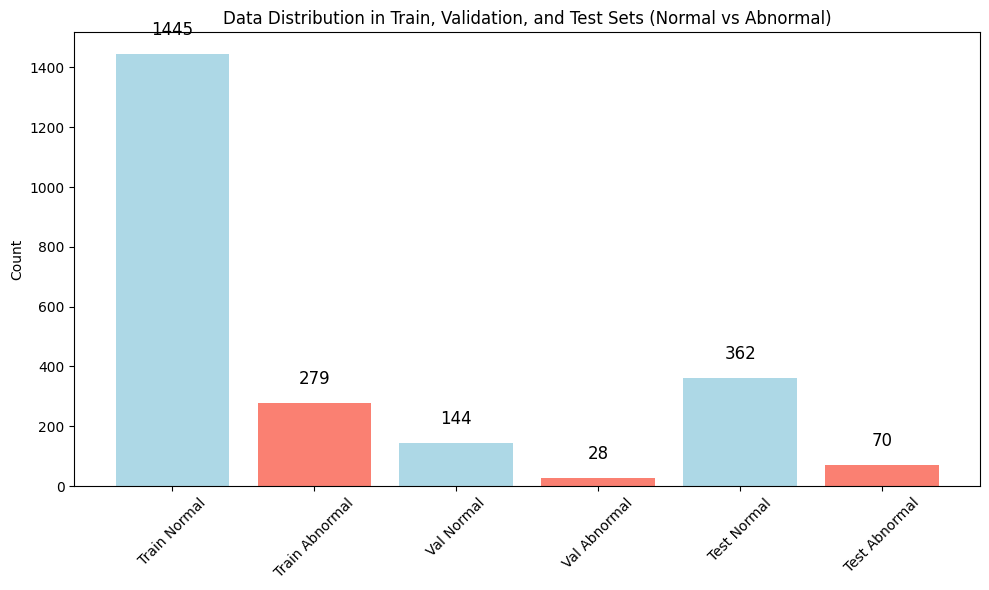

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# -------------------------
# 1. Load and Preprocess Data
# -------------------------
df = pd.read_csv("image_labels.csv")
# Convert to two-class problem: Normal (stage 0) vs Abnormal (stages 1, 2, 3)
df['binary_label'] = df['stage_label'].apply(lambda x: 1 if x != 'Normal Stage' else 0)

# Visualize distribution before splitting
plt.figure(figsize=(8, 6))
bars = df['binary_label'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])

# Add count values on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Normal vs Abnormal')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Abnormal'], rotation=0)
plt.tight_layout()
plt.savefig("normal_vs_abnormal_distribution.png")
plt.show()


# Resize image size and split data
img_size = (224, 224)
X, y = [], []

for _, row in df.iterrows():
    img = load_img(row['image_path'], target_size=img_size)
    img_array = img_to_array(img) / 255.0  # Normalize
    X.append(img_array)
    y.append(row['binary_label'])

X = np.array(X)
y = np.array(y)

# Split data into normal and abnormal
X_normal = X[y == 0]
y_normal = y[y == 0]
X_abnormal = X[y == 1]
y_abnormal = y[y == 1]

# Further split into train, validation, test sets (80-10-10 split for both normal and abnormal)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.2, stratify=y_normal, random_state=42)
X_train_abnormal, X_test_abnormal, y_train_abnormal, y_test_abnormal = train_test_split(X_abnormal, y_abnormal, test_size=0.2, stratify=y_abnormal, random_state=42)

# Combine normal and abnormal data
X_train = np.concatenate((X_train_normal, X_train_abnormal), axis=0)
y_train = np.concatenate((y_train_normal, y_train_abnormal), axis=0)

X_test = np.concatenate((X_test_normal, X_test_abnormal), axis=0)
y_test = np.concatenate((y_test_normal, y_test_abnormal), axis=0)



def build_lenet(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, kernel_size=5, activation='relu'),
        MaxPooling2D(pool_size=2),
        Conv2D(64, kernel_size=5, activation='relu'),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_custom_cnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, kernel_size=3, activation='relu'),
        MaxPooling2D(pool_size=2),
        Conv2D(64, kernel_size=3, activation='relu'),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

models = {
    "LeNet": build_lenet,
    "CustomCNN": build_custom_cnn
}

# -------------------------
# 3. Train and Evaluate
# -------------------------
results = []

for name, model_fn in models.items():
    print(f"\n🔍 Training {name}...")
    tf.keras.backend.clear_session()

    model = model_fn((*img_size, 3))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(patience=3, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                        validation_split=0.1, callbacks=[early_stop], verbose=1)

    val_acc = max(history.history['val_accuracy'])
    y_pred_test = (model.predict(X_test) > 0.5).astype("int32")
    test_acc = np.mean(y_pred_test.flatten() == y_test)

    results.append({'Model': name, 'Validation Accuracy': val_acc, 'Test Accuracy': test_acc})
    print(f"\n✅ {name} Validation Accuracy: {val_acc:.4f}")
    print(f"✅ {name} Test Accuracy: {test_acc:.4f}")

    # Confusion Matrix for Validation
    cm_val = confusion_matrix(y_train, (model.predict(X_train) > 0.5).astype("int32"))
    disp_val = ConfusionMatrixDisplay(cm_val, display_labels=["Normal", "Abnormal"])
    disp_val.plot(cmap="Blues")
    plt.title(f"{name} - Validation Confusion Matrix")
    plt.xlabel("True Label")  # Updated label
    plt.ylabel("Predicted Label")  # Updated label
    plt.savefig(f"{name}_validation_confusion_matrix.png")
    plt.show()

# Confusion Matrix for Test
    cm_test = confusion_matrix(y_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(cm_test, display_labels=["Normal", "Abnormal"])
    disp_test.plot(cmap="Blues")
    plt.title(f"{name} - Test Confusion Matrix")
    plt.xlabel("True Label")  # Updated label
    plt.ylabel("Predicted Label")  # Updated label
    plt.savefig(f"{name}_test_confusion_matrix.png")
    plt.show()


    # Classification report for Validation
    print(f"\n{name} - Validation Classification Report:\n")
    print(classification_report(y_train, (model.predict(X_train) > 0.5).astype("int32"), target_names=["Normal", "Abnormal"]))

    # Classification report for Test
    print(f"\n{name} - Test Classification Report:\n")
    print(classification_report(y_test, y_pred_test, target_names=["Normal", "Abnormal"]))

# -------------------------
# 4. Accuracy Comparison Plot
# -------------------------
df_results = pd.DataFrame(results)

x = np.arange(len(df_results['Model']))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, df_results['Validation Accuracy'], width, label='Validation Accuracy', color='coral')
plt.bar(x + width/2, df_results['Test Accuracy'], width, label='Test Accuracy', color='lightblue')
plt.xticks(x, df_results['Model'], rotation=45)
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.title("Custom CNN Model Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png")
plt.show()

# -------------------------
# 5. Counter Plot for Data Splits
# -------------------------
# Count Normal and Abnormal for Train, Validation, and Test
train_normal_count = np.sum(y_train_normal == 0)
train_abnormal_count = np.sum(y_train_abnormal == 1)

val_normal_count = np.sum(y_train_normal == 0) * 0.1  # Validation is 10% of train_normal
val_abnormal_count = np.sum(y_train_abnormal == 1) * 0.1  # Validation is 10% of train_abnormal

test_normal_count = np.sum(y_test_normal == 0)
test_abnormal_count = np.sum(y_test_abnormal == 1)

# Plotting the bar chart
labels = ['Train Normal', 'Train Abnormal', 'Val Normal', 'Val Abnormal', 'Test Normal', 'Test Abnormal']
counts = [train_normal_count, train_abnormal_count, val_normal_count, val_abnormal_count, test_normal_count, test_abnormal_count]
colors = ['lightblue', 'salmon', 'lightblue', 'salmon', 'lightblue', 'salmon']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=colors)

# Add count values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval), ha='center', va='bottom', fontsize=12)

plt.title('Data Distribution in Train, Validation, and Test Sets (Normal vs Abnormal)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("train_val_test_data_distribution.png")
plt.show()


In [9]:
import numpy as np
import pandas as pd
import os
import glob
from PIL import Image

# Directory containing the FFT text files
fft_dir = "output_fft"
image_dir = "output_images"
csv_file = "image_labels.csv"

# Create folder for images if it doesn't exist
os.makedirs(image_dir, exist_ok=True)

# Get all .txt files
fft_files = sorted(glob.glob(os.path.join(fft_dir, "*.txt")))
if not fft_files:
    print("No FFT files found in output_fft directory.")
    exit()

# Normalization range
min_val = 0.000354
max_val = 122.4995

# Stages mapping
def get_stage(index):
    if 0 <= index <= 650:
        return "Early Stage"
    elif 651 <= index <= 1509:
        return "Normal Stage"
    elif 1510 <= index <= 1940:
        return "Suspect Stage"
    elif 1941 <= index <= 2156:
        return "Inner Race Failure"
    else:
        return "Unknown"

# List to store image names and labels
image_data = []

for i, file_path in enumerate(fft_files):
    # Load FFT values from the text file
    fft_values = np.loadtxt(file_path)

    # Normalize values between 0 and 255
    norm_fft = (fft_values - min_val) / (max_val - min_val) * 255
    norm_fft = np.clip(norm_fft, 0, 255)  # Ensure values stay in range

    # Ensure image dimensions (160x256)
    image_array = norm_fft[:160, :256] if norm_fft.shape[0] >= 160 else norm_fft

    # Convert to grayscale image
    image = Image.fromarray(image_array.astype(np.uint8))
    image = image.resize((256, 160))  # Resize to 256x160

    # Save image
    image_filename = os.path.basename(file_path).replace(".txt", ".png")
    image_path = os.path.join(image_dir, image_filename)
    image.save(image_path)

    # Determine the stage label
    stage_label = get_stage(i)

    # Store in list
    image_data.append([image_filename, stage_label])

# Save labels to CSV
df = pd.DataFrame(image_data, columns=["Image Name", "Stage"])
df.to_csv(csv_file, index=False)

print("All images have been successfully generated and labeled!")
print(f"Labels saved to {csv_file}")


All images have been successfully generated and labeled!
Labels saved to image_labels.csv


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image

# Load the dataset (Image labels)
csv_file = "image_labels.csv"
image_dir = "output_images"
df = pd.read_csv(csv_file)

# Load images and labels
images = []
labels = []

for _, row in df.iterrows():
    img_path = os.path.join(image_dir, row["Image Name"])
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    img = img.resize((256, 160))  # Ensure same size
    img_array = np.array(img) / 255.0  # Normalize
    images.append(img_array)
    labels.append(row["Stage"])

# Convert lists to numpy arrays
X = np.array(images).reshape(-1, 160, 256, 1)  # Reshape for CNN
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 Classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Save the model & label encoder
model.save("bearing_cnn_model.h5")
np.save("label_classes.npy", label_encoder.classes_)

print("Model training complete and saved!")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 89s 806ms/step - accuracy: 0.3989 - loss: 1.2838 - val_accuracy: 0.6505 - val_loss: 0.8010
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 87s 808ms/step - accuracy: 0.6285 - loss: 0.8167 - val_accuracy: 0.8356 - val_loss: 0.4410
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 85s 792ms/step - accuracy: 0.8317 - loss: 0.4613 - val_accuracy: 0.8495 - val_loss: 0.3246
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 144s 808ms/step - accuracy: 0.8586 - loss: 0.3763 - val_accuracy: 0.9074 - val_loss: 0.2276
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 87s 805ms/step - accuracy: 0.8955 - loss: 0.2809 - val_accuracy: 0.8171 - val_loss: 0.5653
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.8873 - loss: 0.3474 - val_accuracy: 0.9028 - val_loss: 0.2270
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 87s 804ms/step - accuracy: 0.9331 - loss: 0.2016 - val_accuracy: 0.9005 - val_loss: 0.2243
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 142s 807ms/step - accuracy: 0.9469 - loss: 0

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model and label encoder
model = load_model("bearing_cnn_model.h5")
label_classes = np.load("label_classes.npy", allow_pickle=True)

# Load X_train data from CSV file
csv_file = "image_labels.csv"
image_dir = "output_images"
df = pd.read_csv(csv_file)

# Filter only X_train images
X_train_df = df.sample(frac=0.8, random_state=42)  # Select 80% as X_train (same split)

# Prepare image data
X_train_images = []
true_labels = []

for _, row in X_train_df.iterrows():
    img_path = os.path.join(image_dir, row["Image Name"])
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    img = img.resize((256, 160))  # Ensure the same size
    img_array = img_to_array(img) / 255.0  # Normalize
    X_train_images.append(img_array)
    true_labels.append(row["Stage"])  # Store actual labels

# Convert lists to numpy arrays
X_train_images = np.array(X_train_images).reshape(-1, 160, 256, 1)  # Reshape for CNN

# Predict labels
predictions = model.predict(X_train_images)
predicted_labels = np.argmax(predictions, axis=1)  # Get class indices
predicted_labels = label_classes[predicted_labels]  # Convert back to class names

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=label_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_classes, yticklabels=label_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for X_train Data")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_classes))


In [ ]:

import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model and label encoder
model = load_model("bearing_cnn_model.h5")
label_classes = np.load("label_classes.npy", allow_pickle=True)

# Load X_test data from CSV file
csv_file = "image_labels.csv"
image_dir = "output_images"
df = pd.read_csv(csv_file)

# Filter only X_test images (remaining 20%)
X_test_df = df.drop(df.sample(frac=0.8, random_state=42).index)

# Prepare image data
X_test_images = []
true_labels_test = []

for _, row in X_test_df.iterrows():
    img_path = os.path.join(image_dir, row["Image Name"])
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    img = img.resize((256, 160))  # Ensure the same size
    img_array = img_to_array(img) / 255.0  # Normalize
    X_test_images.append(img_array)
    true_labels_test.append(row["Stage"])  # Store actual labels

# Convert lists to numpy arrays
X_test_images = np.array(X_test_images).reshape(-1, 160, 256, 1)  # Reshape for CNN

# Predict labels
predictions_test = model.predict(X_test_images)
predicted_labels_test = np.argmax(predictions_test, axis=1)  # Get class indices
predicted_labels_test = label_classes[predicted_labels_test]  # Convert back to class names

# Generate confusion matrix
cm_test = confusion_matrix(true_labels_test, predicted_labels_test, labels=label_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_classes, yticklabels=label_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for X_test Data")
plt.show()

# Print classification report
print("Classification Report for Test Data:")
print(classification_report(true_labels_test, predicted_labels_test, target_names=label_classes))
